## Data assimilation

### Initial assimilation - baseline model to surrogate model

In [1]:
from Models import surrogate_model, baseline_model, initial_tuple_ribba, baseline_hyperparams, RibbyOdeModel, baseline_simple_model
from Assimilation import ribba_model_trainer, compute_assimilated_parameters, to_params
from utils import compare_ribba_model_results, plot_simple_model_results, plot_ribba_model_results
import numpy as np

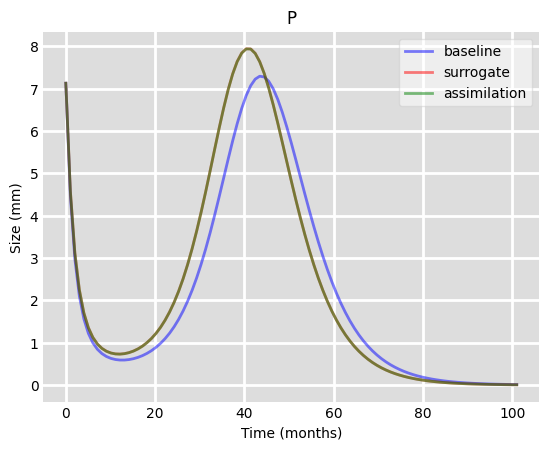

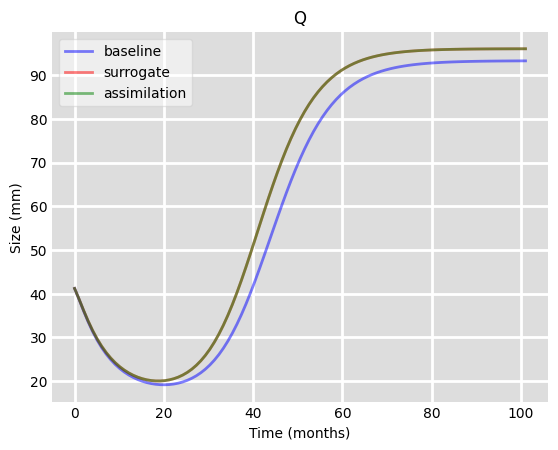

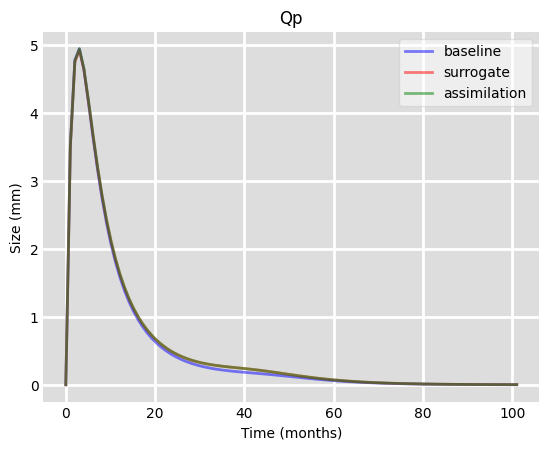

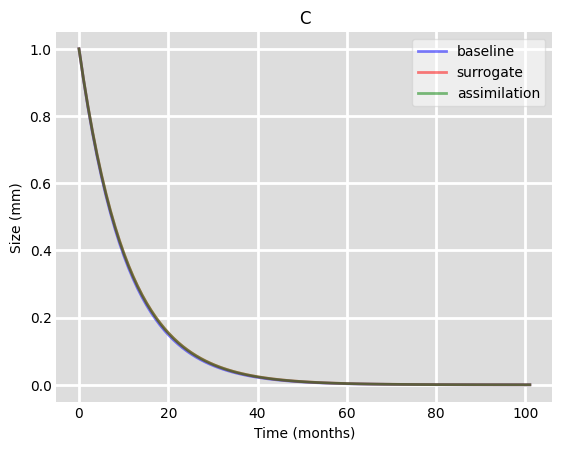

In [2]:
time_range = np.linspace(0, 101, 101)
surrogate_model.compute(initial_tuple_ribba, time_range)

assimilated_hyperparams = compute_assimilated_parameters(ribba_model_trainer, surrogate_model.result, baseline_hyperparams)

assimilated_model = RibbyOdeModel(to_params(assimilated_hyperparams))
assimilated_model.compute(initial_tuple_ribba, time_range)
baseline_model.compute(initial_tuple_ribba, time_range)

compare_ribba_model_results([baseline_model.result,
  surrogate_model.result,
  assimilated_model.result], 
  time_range,
  ['baseline', 'surrogate', 'assimilation'])

### Initial assimilation - simple model to baseline model

In [3]:
from Models import initial_tuple_test, RibbySimplifiedOdeModel, baseline_simple_model
from Assimilation import simple_model_trainer, to_params_simple
from utils import compare_simple_model_results
import numpy as np

 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.6043177261814D+02   r2 =  0.1633793052284D-09
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2022680499855D+02   r2 =  0.1422706593571D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2022680499855D+02   r2 =  0.1422706593571D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2022680499855D+02   r2 =  0.1177976289066D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       suc

/opt/homebrew/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/homebrew/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


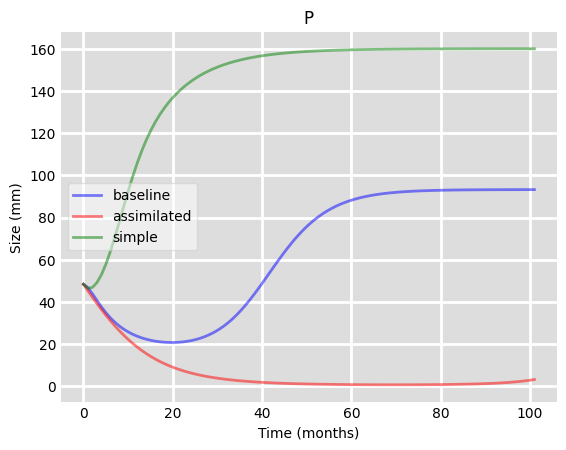

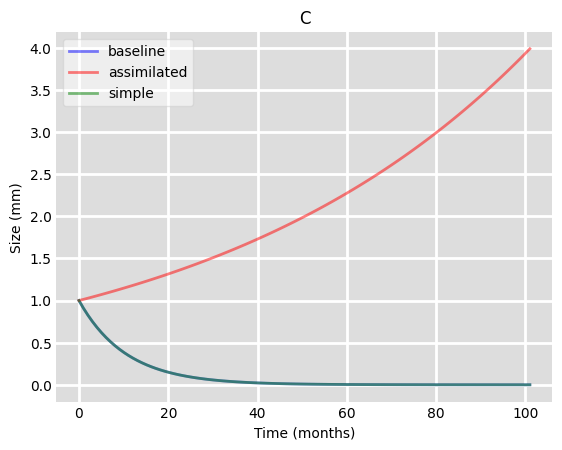

In [4]:
time_range = np.linspace(0, 101, 101)
baseline_model.compute(initial_tuple_ribba, time_range)
parsed_baseline_model_results = {
  'P': baseline_model.result['P'] + baseline_model.result['Q'] + baseline_model.result['Qp'],
  'C': baseline_model.result['C']
}

# bounds = [[0,1] for _ in range(6)]
assimilated_hyperparams = compute_assimilated_parameters(simple_model_trainer, parsed_baseline_model_results, baseline_hyperparams)

print(assimilated_hyperparams)
assimilated_model = RibbySimplifiedOdeModel(to_params(assimilated_hyperparams))
assimilated_model.compute(initial_tuple_test, time_range)

baseline_simple_model.compute(initial_tuple_test, time_range)

compare_simple_model_results([parsed_baseline_model_results, assimilated_model.result, baseline_simple_model.result], 
  time_range,
  ['baseline', 'assimilated', 'simple'])

### Assimilation - simple model with restricted params

In [5]:
from Assimilation import simple_less_params_trainer, to_params_simple
from Models import simplified_baseline_hyperparams

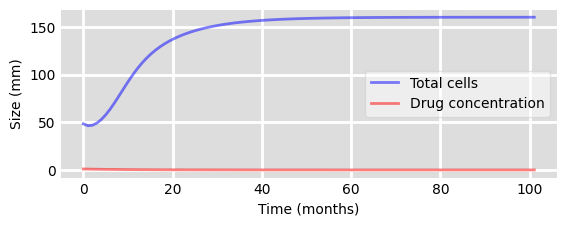

In [6]:
time_range = np.linspace(0, 101, 101)
baseline_simple_model.compute(initial_tuple_test, time_range)

plot_simple_model_results(baseline_simple_model.result, time_range, '')

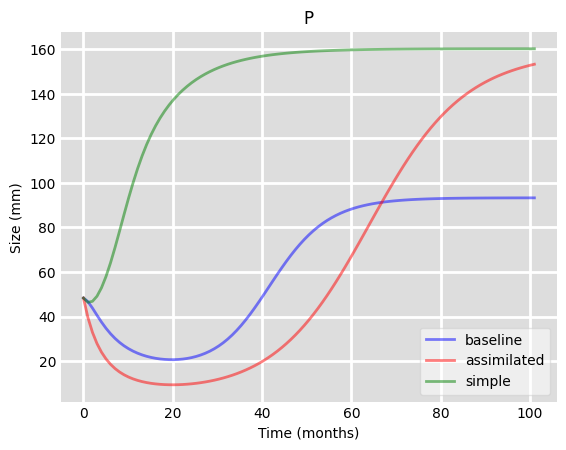

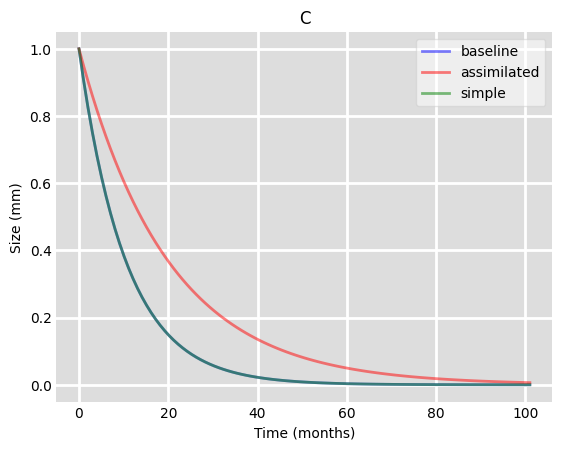

In [7]:
time_range = np.linspace(0, 101, 101)
baseline_model.compute(initial_tuple_ribba, time_range)
parsed_baseline_model_results = {
  'P': baseline_model.result['P'] + baseline_model.result['Q'] + baseline_model.result['Qp'],
  'C': baseline_model.result['C']
}

bounds = [[None,None] for _ in range(4)]
bounds[2] = [0.05, 0.15]
assimilated_hyperparams = compute_assimilated_parameters(simple_less_params_trainer, parsed_baseline_model_results, simplified_baseline_hyperparams, bounds)

assimilated_model = RibbySimplifiedOdeModel(to_params_simple(assimilated_hyperparams))
assimilated_model.compute(initial_tuple_test, time_range)

baseline_simple_model.compute(initial_tuple_test, time_range)

compare_simple_model_results([parsed_baseline_model_results, assimilated_model.result, baseline_simple_model.result], 
  time_range,
  ['baseline', 'assimilated', 'simple'])

### Assimilation - simple model with restricted params with restricted cure decay

In [8]:
from Assimilation import simple_constrained_trainer, to_params_constrained

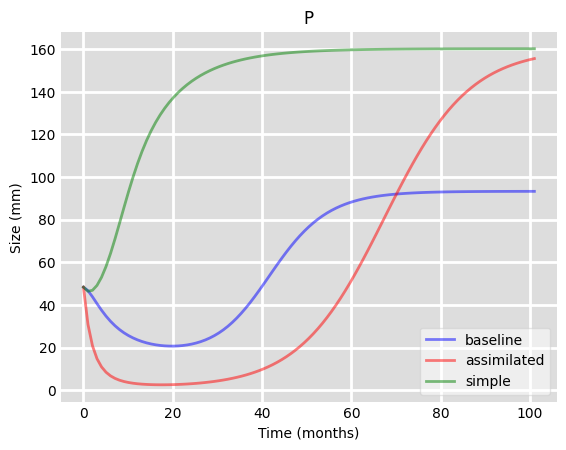

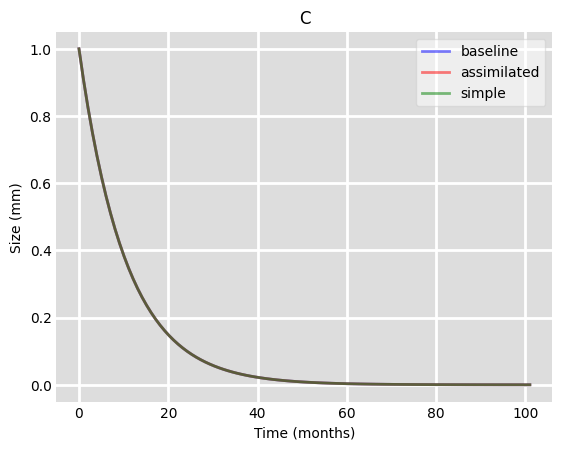

In [9]:
time_range = np.linspace(0, 101, 101)
baseline_model.compute(initial_tuple_ribba, time_range)
parsed_baseline_model_results = {
  'P': baseline_model.result['P'] + baseline_model.result['Q'] + baseline_model.result['Qp'],
  'C': baseline_model.result['C']
}

hyperparams = simplified_baseline_hyperparams.copy()
hyperparams.pop('KDE')

assimilated_hyperparams = compute_assimilated_parameters(
  simple_constrained_trainer,
  parsed_baseline_model_results,
  hyperparams
)

hyperparams = to_params_constrained(assimilated_hyperparams)
hyperparams['KDE'] = simplified_baseline_hyperparams['KDE']
assimilated_model = RibbySimplifiedOdeModel(hyperparams)
assimilated_model.compute(initial_tuple_test, time_range)

baseline_simple_model.compute(initial_tuple_test, time_range)

compare_simple_model_results([parsed_baseline_model_results, assimilated_model.result, baseline_simple_model.result], 
  time_range,
  ['baseline', 'assimilated', 'simple'])

### Assimilation - therapy assimilation

In [11]:
from Therapy import gliomas_therapy, gliomas_simple_therapy, gliomas_simple_strategy, Therapy
from Assimilation import simple_therapy_trainer, simple_less_params_therapy_trainer, simple_constrained_therapy_trainer

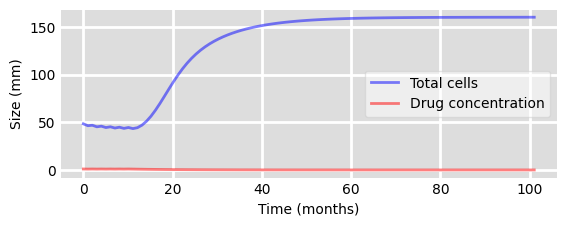

In [12]:
time_range = np.linspace(0, 101, 101)

gliomas_simple_therapy.compute_therapy(time_range, initial_tuple_test)
plot_simple_model_results(gliomas_simple_therapy.results, time_range, '')

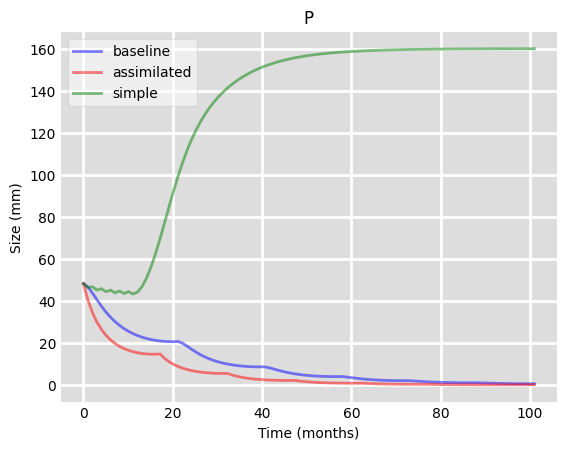

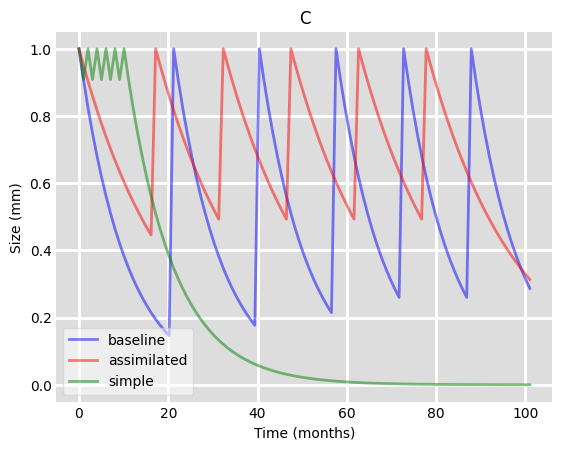

In [19]:
time_range = np.linspace(0, 101, 101)
gliomas_therapy.compute_therapy(time_range, initial_tuple_ribba)

parsed_baseline_model_results = {
  'P': gliomas_therapy.results['P'] + gliomas_therapy.results['Q'] + gliomas_therapy.results['Qp'],
  'C': gliomas_therapy.results['C']
}

bounds = [[None,None] for _ in range(4)]
bounds[2] = [0.05, 0.15]
assimilated_hyperparams = compute_assimilated_parameters(simple_less_params_therapy_trainer, parsed_baseline_model_results, simplified_baseline_hyperparams, bounds)

assimilated_therapy = Therapy(RibbySimplifiedOdeModel(to_params_simple(assimilated_hyperparams)), gliomas_simple_strategy)
assimilated_therapy.compute_therapy(time_range, initial_tuple_test)

gliomas_simple_therapy.compute_therapy(time_range, initial_tuple_test)

compare_simple_model_results([parsed_baseline_model_results, assimilated_therapy.results, gliomas_simple_therapy.results], 
  time_range,
  ['baseline', 'assimilated', 'simple'])

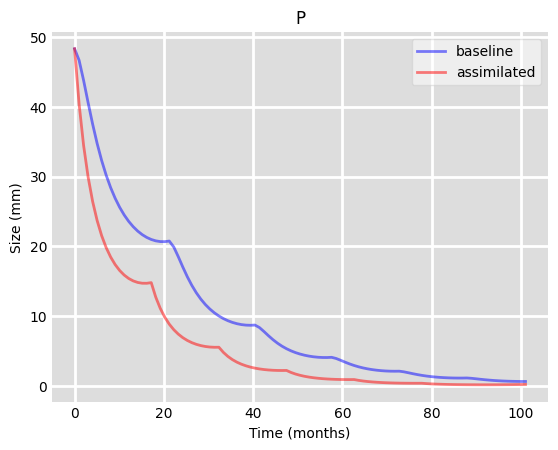

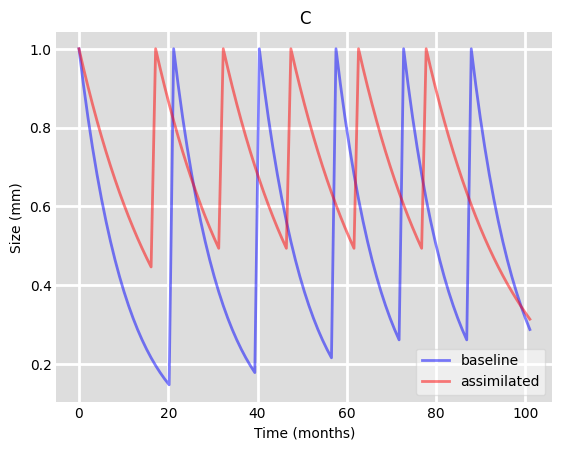

In [20]:
compare_simple_model_results([parsed_baseline_model_results, assimilated_therapy.results], 
  time_range,
  ['baseline', 'assimilated'])

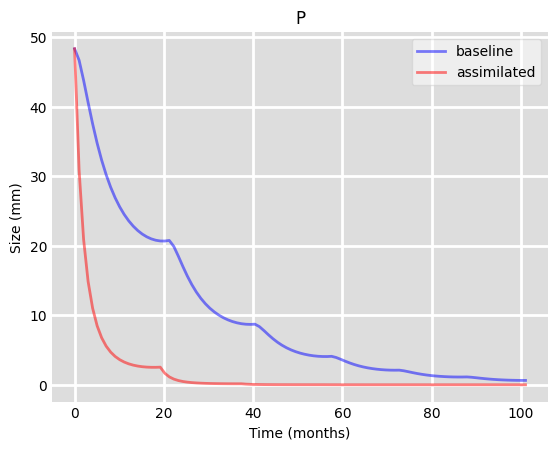

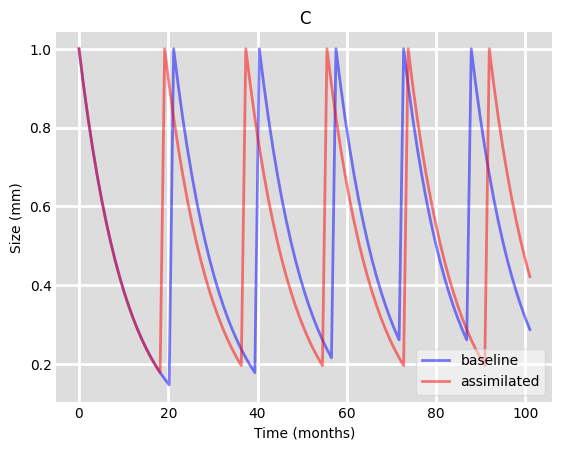

In [18]:
time_range = np.linspace(0, 101, 101)
gliomas_therapy.compute_therapy(time_range, initial_tuple_ribba)

parsed_baseline_model_results = {
  'P': gliomas_therapy.results['P'] + gliomas_therapy.results['Q'] + gliomas_therapy.results['Qp'],
  'C': gliomas_therapy.results['C']
}

hyperparams = simplified_baseline_hyperparams.copy()
hyperparams.pop('KDE')

assimilated_hyperparams = compute_assimilated_parameters(
  simple_constrained_therapy_trainer,
  parsed_baseline_model_results,
  hyperparams
)

hyperparams = to_params_constrained(assimilated_hyperparams)
hyperparams['KDE'] = simplified_baseline_hyperparams['KDE']
assimilated_therapy_constrained = Therapy(RibbySimplifiedOdeModel(hyperparams), gliomas_simple_strategy)
assimilated_therapy_constrained.compute_therapy(time_range, initial_tuple_test)

compare_simple_model_results([parsed_baseline_model_results, assimilated_therapy_constrained.results], 
  time_range,
  ['baseline', 'assimilated'])

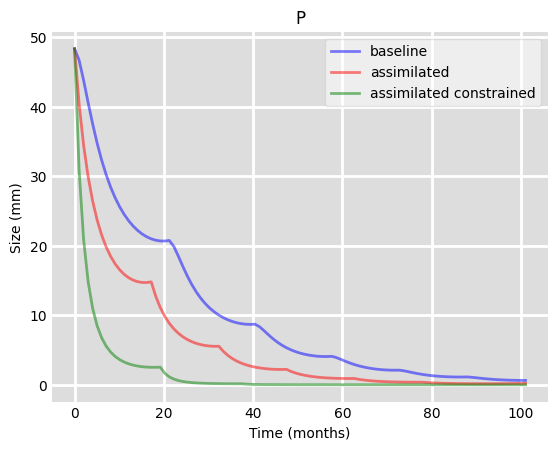

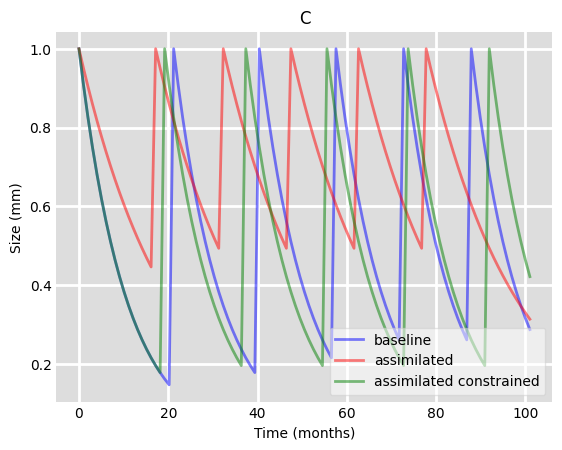

In [21]:
compare_simple_model_results([parsed_baseline_model_results, assimilated_therapy.results, assimilated_therapy_constrained.results], 
  time_range,
  ['baseline', 'assimilated', 'assimilated constrained'])